In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [117]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [118]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [119]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [120]:
data_train.shape

(614, 13)

In [121]:
data_train.isnull().sum() #the null values of each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
data_train['Education'].value_counts() #to count each value

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [123]:
def combined_data():
    train=pd.read_csv('train.csv')
    test=pd.read_csv('test.csv')
    target=train.Loan_Status
    train.drop(['Loan_ID'],axis=1,inplace =True)
    combined=train.append(test,sort=False)
    combined.drop([ 'Loan_ID'], inplace=True, axis=1)
    return combined
    
    

In [124]:
combined =combined_data()
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [126]:
 combined['Gender'].fillna('Male', inplace=True)
 combined['LoanAmount'].fillna(combined['LoanAmount'].median(),inplace=True,)
 combined['Married'].fillna('No',inplace=True)
 combined['Credit_History'].fillna(2, inplace=True)

In [127]:
combined.isnull().sum()

Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [128]:
combined['Self_Employed'].fillna('No',inplace=True)
combined.drop(['Loan_Status'],axis=1,inplace=True)


In [129]:
combined

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban


In [130]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [131]:
combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})
combined['Education']=combined['Education'].map({'Graduate':1,'Not Graduate':0})
combined['Married']=combined['Married'].map({'Yes':1,'No':0})
combined['Self_Employed']=combined['Self_Employed'].map({'Yes':1,'No':0})

In [132]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,126.0,360.0,1.0,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban


In [133]:
combined['Total_Income']=combined['ApplicantIncome']+combined['CoapplicantIncome']
combined.drop(['ApplicantIncome','CoapplicantIncome'],inplace =True ,axis=1)
combined

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,1,0,126.0,360.0,1.0,Urban,5849.0
1,1,1,1,1,0,128.0,360.0,1.0,Rural,6091.0
2,1,1,0,1,1,66.0,360.0,1.0,Urban,3000.0
3,1,1,0,0,0,120.0,360.0,1.0,Urban,4941.0
4,1,0,0,1,0,141.0,360.0,1.0,Urban,6000.0
5,1,1,2,1,1,267.0,360.0,1.0,Urban,9613.0
6,1,1,0,0,0,95.0,360.0,1.0,Urban,3849.0
7,1,1,3+,1,0,158.0,360.0,0.0,Semiurban,5540.0
8,1,1,2,1,0,168.0,360.0,1.0,Urban,5532.0
9,1,1,1,1,0,349.0,360.0,1.0,Semiurban,23809.0


In [134]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,1,0,126.0,360.0,1.0,Urban,5849.0
1,1,1,1,1,0,128.0,360.0,1.0,Rural,6091.0
2,1,1,0,1,1,66.0,360.0,1.0,Urban,3000.0
3,1,1,0,0,0,120.0,360.0,1.0,Urban,4941.0
4,1,0,0,1,0,141.0,360.0,1.0,Urban,6000.0


In [135]:
combined['Debt_Income_Ratio']=combined['Total_Income']/combined['LoanAmount']

In [136]:
combined.head()


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Debt_Income_Ratio
0,1,0,0,1,0,126.0,360.0,1.0,Urban,5849.0,46.420635
1,1,1,1,1,0,128.0,360.0,1.0,Rural,6091.0,47.585938
2,1,1,0,1,1,66.0,360.0,1.0,Urban,3000.0,45.454545
3,1,1,0,0,0,120.0,360.0,1.0,Urban,4941.0,41.175000
4,1,0,0,1,0,141.0,360.0,1.0,Urban,6000.0,42.553191


In [137]:
combined['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [138]:
combined['Credit_History'].value_counts()

1.0    754
0.0    148
2.0     79
Name: Credit_History, dtype: int64

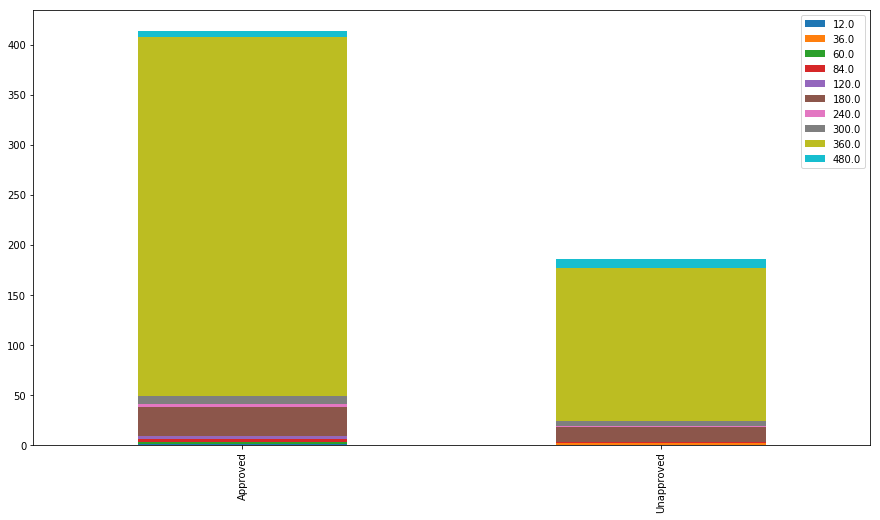

In [139]:
approved_term = data_train[data_train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [140]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Debt_Income_Ratio
0,1,0,0,1,0,126.0,360.0,1.0,Urban,5849.0,46.420635
1,1,1,1,1,0,128.0,360.0,1.0,Rural,6091.0,47.585938
2,1,1,0,1,1,66.0,360.0,1.0,Urban,3000.0,45.454545
3,1,1,0,0,0,120.0,360.0,1.0,Urban,4941.0,41.175000
4,1,0,0,1,0,141.0,360.0,1.0,Urban,6000.0,42.553191


In [141]:
def process_dependents():
    global combined
    combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
    combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
    combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    combined.drop(['Dependents'], axis=1, inplace=True)
    return combined 

In [142]:
process_dependents()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Debt_Income_Ratio,Singleton,Small_Family,Large_Family
0,1,0,1,0,126.0,360.0,1.0,Urban,5849.0,46.420635,0,0,0
1,1,1,1,0,128.0,360.0,1.0,Rural,6091.0,47.585938,1,0,0
2,1,1,1,1,66.0,360.0,1.0,Urban,3000.0,45.454545,0,0,0
3,1,1,0,0,120.0,360.0,1.0,Urban,4941.0,41.175000,0,0,0
4,1,0,1,0,141.0,360.0,1.0,Urban,6000.0,42.553191,0,0,0
5,1,1,1,1,267.0,360.0,1.0,Urban,9613.0,36.003745,0,1,0
6,1,1,0,0,95.0,360.0,1.0,Urban,3849.0,40.515789,0,0,0
7,1,1,1,0,158.0,360.0,0.0,Semiurban,5540.0,35.063291,0,0,1
8,1,1,1,0,168.0,360.0,1.0,Urban,5532.0,32.928571,0,1,0
9,1,1,1,0,349.0,360.0,1.0,Semiurban,23809.0,68.220630,1,0,0


In [143]:
def process_credit_history():
    global combined
    combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
    combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
    combined['Credit_History_Unknown'] = combined['Credit_History'].map(lambda c: 1 if c==2 else 0)
    combined.drop(['Credit_History'], axis=1, inplace=True)
    return combined

In [144]:
process_credit_history()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Property_Area,Total_Income,Debt_Income_Ratio,Singleton,Small_Family,Large_Family,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown
0,1,0,1,0,126.0,360.0,Urban,5849.0,46.420635,0,0,0,0,1,0
1,1,1,1,0,128.0,360.0,Rural,6091.0,47.585938,1,0,0,0,1,0
2,1,1,1,1,66.0,360.0,Urban,3000.0,45.454545,0,0,0,0,1,0
3,1,1,0,0,120.0,360.0,Urban,4941.0,41.175000,0,0,0,0,1,0
4,1,0,1,0,141.0,360.0,Urban,6000.0,42.553191,0,0,0,0,1,0
5,1,1,1,1,267.0,360.0,Urban,9613.0,36.003745,0,1,0,0,1,0
6,1,1,0,0,95.0,360.0,Urban,3849.0,40.515789,0,0,0,0,1,0
7,1,1,1,0,158.0,360.0,Semiurban,5540.0,35.063291,0,0,1,1,0,0
8,1,1,1,0,168.0,360.0,Urban,5532.0,32.928571,0,1,0,0,1,0
9,1,1,1,0,349.0,360.0,Semiurban,23809.0,68.220630,1,0,0,0,1,0


In [145]:
def process_property():
    global combined
    property_dummies = pd.get_dummies(combined['Property_Area'], prefix='Property')
    combined = pd.concat([combined, property_dummies], axis=1)
    combined.drop(['Property_Area'], axis=1, inplace=True)
    return combined.head()

In [146]:
process_property()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Total_Income,Debt_Income_Ratio,Singleton,Small_Family,Large_Family,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,126.0,360.0,5849.0,46.420635,0,0,0,0,1,0,0,0,1
1,1,1,1,0,128.0,360.0,6091.0,47.585938,1,0,0,0,1,0,1,0,0
2,1,1,1,1,66.0,360.0,3000.0,45.454545,0,0,0,0,1,0,0,0,1
3,1,1,0,0,120.0,360.0,4941.0,41.175000,0,0,0,0,1,0,0,0,1
4,1,0,1,0,141.0,360.0,6000.0,42.553191,0,0,0,0,1,0,0,0,1


In [147]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Total_Income,Debt_Income_Ratio,Singleton,Small_Family,Large_Family,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,126.0,360.0,5849.0,46.420635,0,0,0,0,1,0,0,0,1
1,1,1,1,0,128.0,360.0,6091.0,47.585938,1,0,0,0,1,0,1,0,0
2,1,1,1,1,66.0,360.0,3000.0,45.454545,0,0,0,0,1,0,0,0,1
3,1,1,0,0,120.0,360.0,4941.0,41.175000,0,0,0,0,1,0,0,0,1
4,1,0,1,0,141.0,360.0,6000.0,42.553191,0,0,0,0,1,0,0,0,1


In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [149]:
combined.shape

(981, 17)

In [150]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df

In [151]:
combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_Income']=feature_scaling(combined['Total_Income'])
combined['Debt_Income_Ratio'] = feature_scaling(combined['Debt_Income_Ratio'])

In [152]:
combined

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Total_Income,Debt_Income_Ratio,Singleton,Small_Family,Large_Family,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,0.169320,360.0,0.055394,0.071120,0,0,0,0,1,0,0,0,1
1,1,1,1,0,0.172214,360.0,0.058435,0.073382,1,0,0,0,1,0,1,0,0
2,1,1,1,1,0.082489,360.0,0.019583,0.069245,0,0,0,0,1,0,0,0,1
3,1,1,0,0,0.160637,360.0,0.043980,0.060939,0,0,0,0,1,0,0,0,1
4,1,0,1,0,0.191027,360.0,0.057292,0.063614,0,0,0,0,1,0,0,0,1
5,1,1,1,1,0.373372,360.0,0.102705,0.050902,0,1,0,0,1,0,0,0,1
6,1,1,0,0,0.124457,360.0,0.030255,0.059660,0,0,0,0,1,0,0,0,1
7,1,1,1,0,0.215630,360.0,0.051510,0.049077,0,0,1,1,0,0,0,1,0
8,1,1,1,0,0.230101,360.0,0.051409,0.044934,0,1,0,0,1,0,0,0,1
9,1,1,1,0,0.492041,360.0,0.281141,0.113432,1,0,0,0,1,0,0,1,0


In [153]:
def process_loan_term():
    global combined
    combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    combined.drop(['Loan_Amount_Term'], axis=1, inplace=True)
    return combined

In [154]:
process_loan_term()

,Gender,Married,Education,Self_Employed,LoanAmount,Total_Income,Debt_Income_Ratio,Singleton,Small_Family,Large_Family,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,1,0,1,0,0.169320,0.055394,0.071120,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1,1,1,0,0.172214,0.058435,0.073382,1,0,0,0,1,0,1,0,0,0,0,0,1
2,1,1,1,1,0.082489,0.019583,0.069245,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,1,0,0,0.160637,0.043980,0.060939,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1,0,1,0,0.191027,0.057292,0.063614,0,0,0,0,1,0,0,0,1,0,0,0,1
5,1,1,1,1,0.373372,0.102705,0.050902,0,1,0,0,1,0,0,0,1,0,0,0,1
6,1,1,0,0,0.124457,0.030255,0.059660,0,0,0,0,1,0,0,0,1,0,0,0,1
7,1,1,1,0,0.215630,0.051510,0.049077,0,0,1,1,0,0,0,1,0,0,0,0,1
8,1,1,1,0,0.230101,0.051409,0.044934,0,1,0,0,1,0,0,0,1,0,0,0,1
9,1,1,1,0,0.492041,0.281141,0.113432,1,0,0,0,1,0,0,1,0,0,0,0,1


In [155]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Total_Income,Debt_Income_Ratio,Singleton,Small_Family,Large_Family,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,1,0,1,0,0.169320,0.055394,0.071120,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1,1,1,0,0.172214,0.058435,0.073382,1,0,0,0,1,0,1,0,0,0,0,0,1
2,1,1,1,1,0.082489,0.019583,0.069245,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,1,0,0,0.160637,0.043980,0.060939,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1,0,1,0,0.191027,0.057292,0.063614,0,0,0,0,1,0,0,0,1,0,0,0,1


In [156]:
def recover_train_test_target():
    global combined, data_train
    targets = data_train['Loan_Status'].map({'Y':1,'N':0})
    train = combined.head(614)
    test = combined.iloc[614:]
    return train, test, targets

In [157]:
train, test, targets = recover_train_test_target()

In [158]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [159]:
y_pred=clf.predict(test)
y_pred
#the prediction of laon_status of test data 

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [166]:
y_pred.shape

(367,)

In [170]:
test['Loan_status'] = y_pred
test

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Gender,Married,Education,Self_Employed,LoanAmount,Total_Income,Debt_Income_Ratio,Singleton,Small_Family,Large_Family,...,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Loan_status
0,1,1,1,0,0.146165,0.053772,0.081950,0,0,0,...,1,0,0,0,1,0,0,0,1,1
1,1,1,1,0,0.169320,0.039393,0.051511,1,0,0,...,1,0,0,0,1,0,0,0,1,1
2,1,1,1,0,0.287988,0.067347,0.044475,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,1,1,1,0,0.131693,0.043289,0.075855,0,1,0,...,0,1,0,0,1,0,0,0,1,1
4,1,0,0,0,0.099855,0.023052,0.062540,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,1,1,0,1,0.206946,0.052100,0.052363,0,0,0,...,1,0,0,0,1,0,0,0,1,1
6,0,0,0,0,0.072359,0.009854,0.054250,1,0,0,...,1,0,0,1,0,0,0,0,1,1
7,1,1,0,0,0.199711,0.030657,0.032265,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8,1,1,1,0,0.392185,0.153234,0.075524,0,1,0,...,1,0,0,0,1,0,0,1,0,1
9,1,0,0,0,0.164978,0.042208,0.056765,0,0,0,...,1,0,0,1,0,0,0,0,1,1


In [171]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

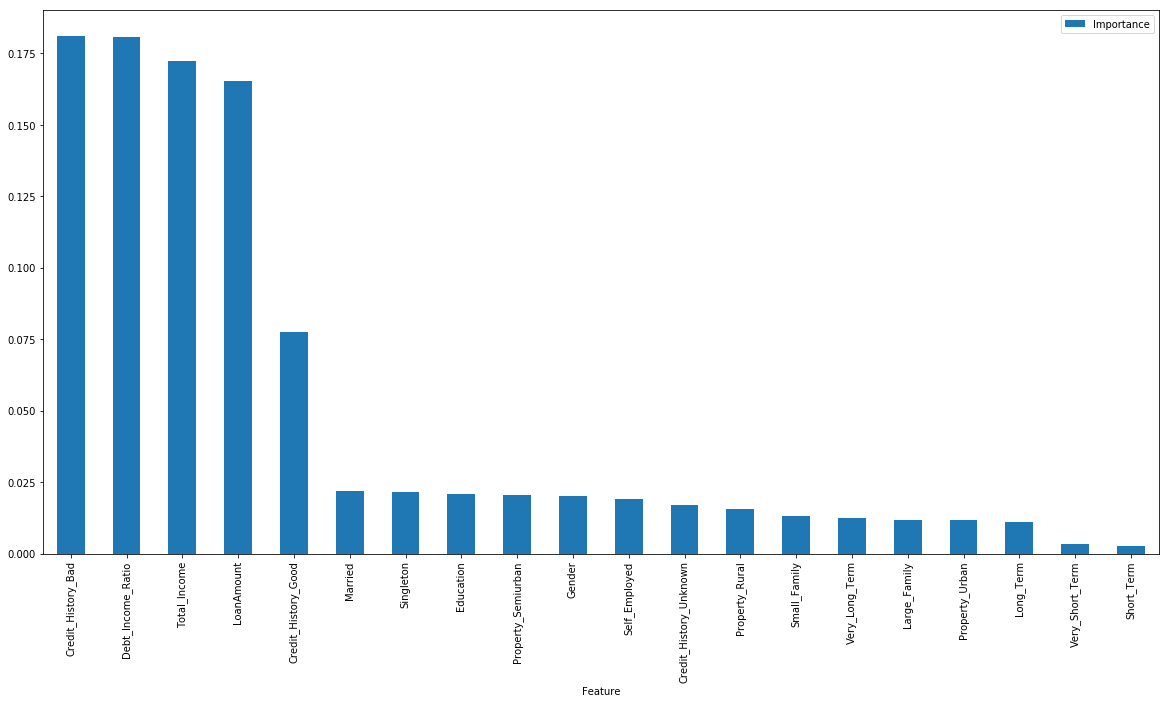

In [172]:
features.plot(kind='bar', figsize=(20, 10))